## Desafío - Árboles de Regresión

**Nombre alumno:** Julio Valdés

Profesor: Gabriel Tamayo L.

Generación: G5

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la seccióncorrespondiente.

### Descripción
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

#### Ejercicio 1: Preparación del ambiente de trabajo
* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('ames_housing.csv').drop(columns = 'Unnamed: 0')

In [19]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


#### Ejercicio 2: Feature engineering
* Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
    1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. 


In [20]:
for colname, serie in df.iteritems():
    if serie.dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[colname], drop_first = True, prefix = colname)], axis=1).drop(columns = colname)

In [28]:
df.shape

(2930, 307)

#### Ejercicio 3: Primer modelo
* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Sale_Price'), df['Sale_Price'], test_size=.33, random_state=11238)

In [44]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

In [49]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)).round(5))
print("Test MAE:", median_absolute_error(y_test, y_pred).round(5))
print("Test R2:", r2_score(y_test, y_pred).round(5))

Test RMSE: 38239.87811
Test MAE: 15600.0
Test R2: 0.74271


#### Comentarios
* De acuerdo al RMSE y R2 el desempeño del modelo es bueno pero es posible seguir mejorando.

#### Ejercicio 4: Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [72]:
def plot_importance(fit_model, feat_names):
   tmp_importance = fit_model.feature_importances_
   sort_importance = np.argsort(tmp_importance)[::-1][:10]
   names = [feat_names[i] for i in sort_importance]
   plt.title("Feature importance")
   plt.barh(range(len(names)), tmp_importance[sort_importance])
   plt.yticks(range(len(names)), names, rotation=0)

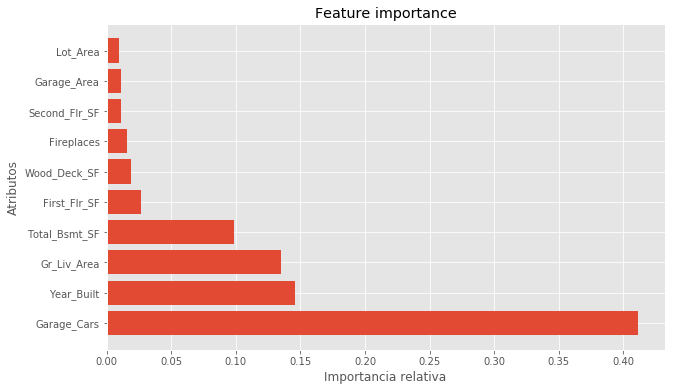

In [73]:
plot_importance(dec_tree, df.drop(columns = 'Sale_Price').columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

#### Comentarios
* Los 10 principales atributos que afectan la predicción de Sale_Price son: Garage_Cars, Year_Built, Gr_Liv_Area, Total_Bsmt_SF, First_Flr_SF, Wood_Deck_SF, Fireplaces, Second_Flr_SF, Garage_Area, Lot_Area

In [75]:
df_new = df.loc[:, ['Garage_Cars', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Wood_Deck_SF', 'Fireplaces', 'Second_Flr_SF', 'Garage_Area', 'Lot_Area', 'Sale_Price']]

#### Ejercicio 5: Refactorización del modelo y pickling
* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

In [76]:
X_tr, X_te, y_tr, y_te = train_test_split(df_new.drop(columns = 'Sale_Price'), df_new['Sale_Price'], test_size=.33, random_state=11238)

In [77]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(), {
    'max_depth': np.linspace(1, 32, 32),
    'max_features': list(range(1, X_tr.shape[1]))}, cv=5).fit(X_tr, y_tr)

In [81]:
print("La mejor combinación de hiperparámetros es: ", dec_tree_grid_cv.best_params_)
print("El desempeño en la muestra de entrenamiento es de: ", dec_tree_grid_cv.best_score_.round(3))

La mejor combinación de hiperparámetros es:  {'max_depth': 7.0, 'max_features': 7}
El desempeño en la muestra de entrenamiento es de:  0.762


In [84]:
dec_tree_best = dec_tree_grid_cv.best_estimator_
y_pr = dec_tree_best.predict(X_te)
print("Test RMSE:", np.sqrt(mean_squared_error(y_te, y_pr)).round(5))
print("Test MAE:", median_absolute_error(y_te, y_pr).round(5))
print("Test R2:", r2_score(y_te, y_pr).round(5))

Test RMSE: 40522.26992
Test MAE: 17995.30901
Test R2: 0.71108


#### Pickling
* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle.
* pickle contiene la función dump , que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

```python  
pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav','wb'))
```

* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [87]:
from pickle import dump

dump(dec_tree_best, open('dec_tree_best.sav','wb'))
dump(X_tr, open('X_train.sav','wb'))
dump(y_tr, open('y_train.sav','wb'))
dump(X_te, open('X_test.sav','wb'))
dump(y_te, open('y_test.sav','wb'))